# Objective and Overview:

An eCommerce Transactions datast consisting of three files, namely Customers.csv, Products.csv and Transactions.csv is given. The task in hand is to perform EDA, build predictive models and derive actionable insights.

# Files Description:

1. Customers.csv
○ CustomerID: Unique identifier for each customer.
○ CustomerName: Name of the customer.
○ Region: Continent where the customer resides.
○ SignupDate: Date when the customer signed up.
2. Products.csv
○ ProductID: Unique identifier for each product.
○ ProductName: Name of the product.
○ Category: Product category.
○ Price: Product price in USD.
3. Transactions.csv
○ TransactionID: Unique identifier for each transaction.
○ CustomerID: ID of the customer who made the transaction.
○ ProductID: ID of the product sold.
○ TransactionDate: Date of th
○ Quantity: Quantity of the product purchased.
○ TotalValue: Total value of the transaction.
○ Price: Price of the product sold.
e transaction.

# Task 1:Exploratory Data Analysis and Business Insights

The five business insights that are to be derived during the EDA process is as follows:

1. Products with higher sales margin
2. Revenue driving factor
3. Volume and Nature of the transactions
4. Growth of the sales over a period of time
5. Regional spending variations

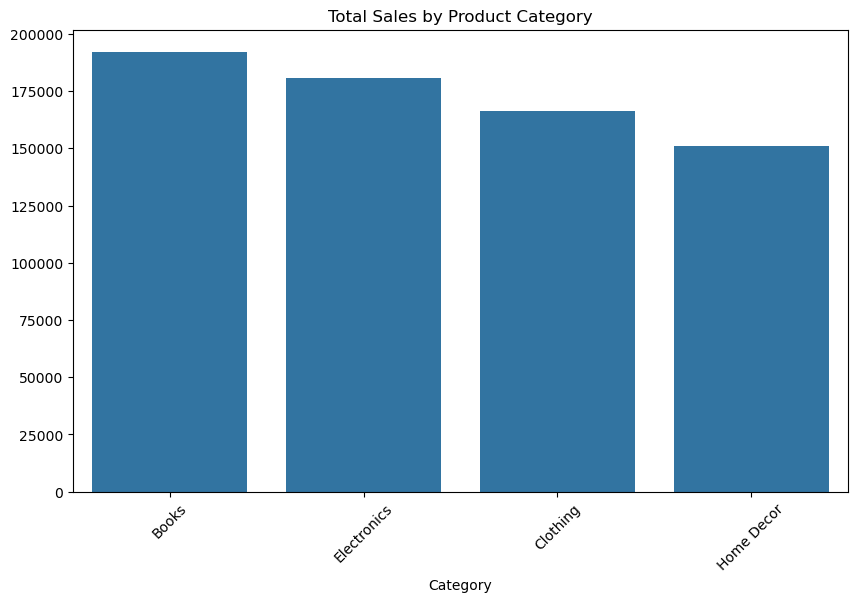

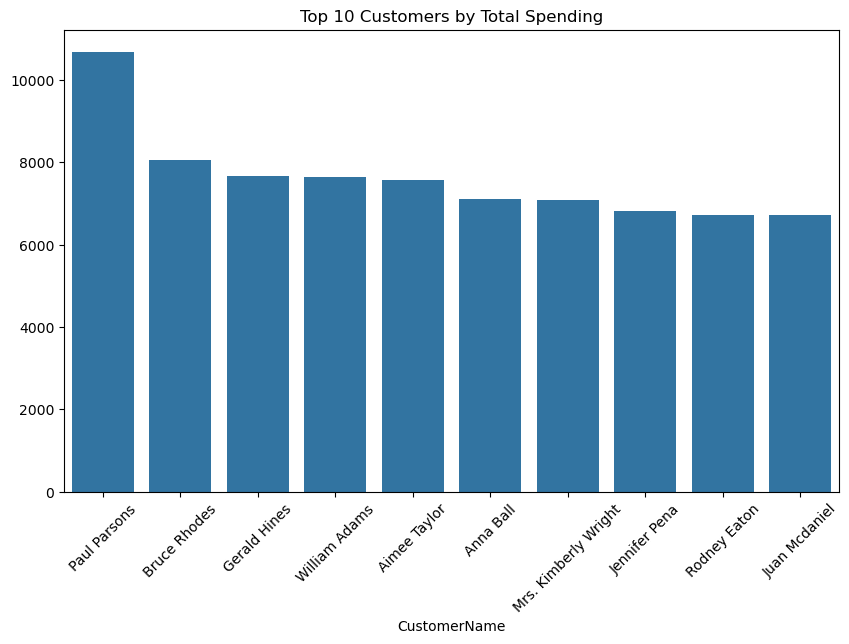

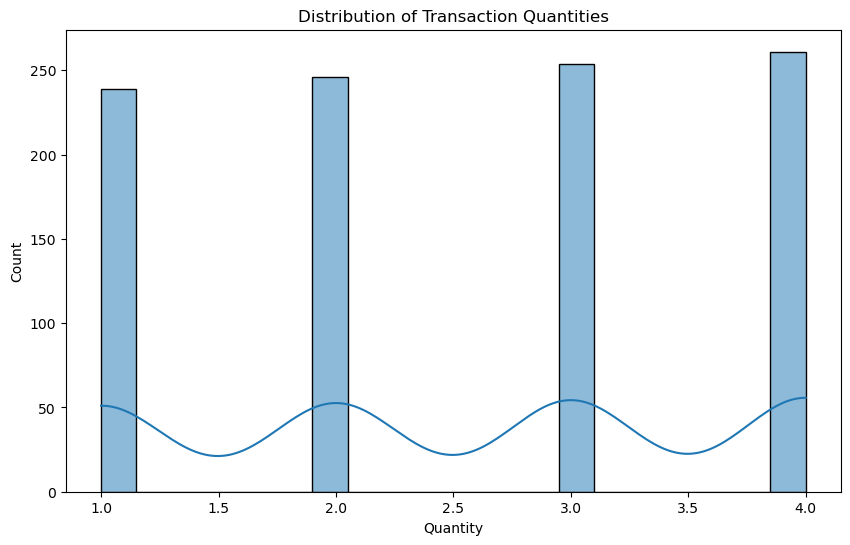

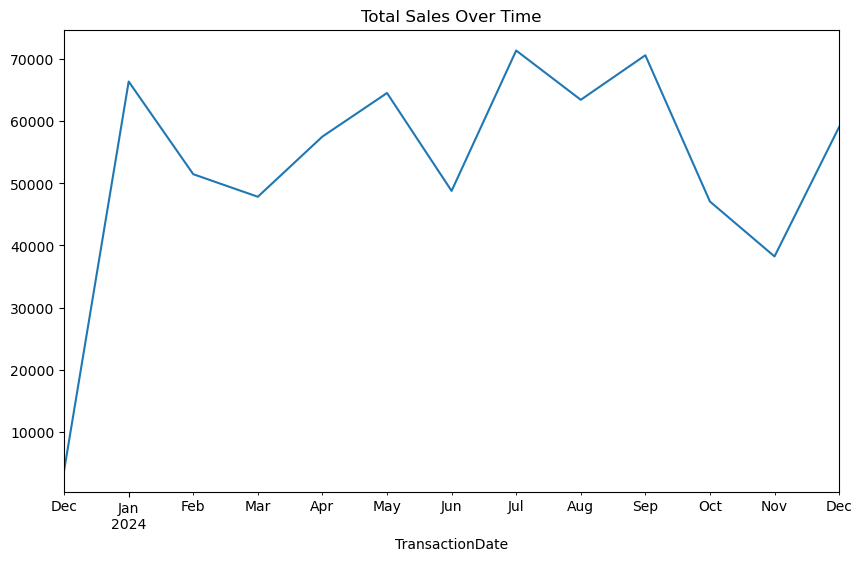

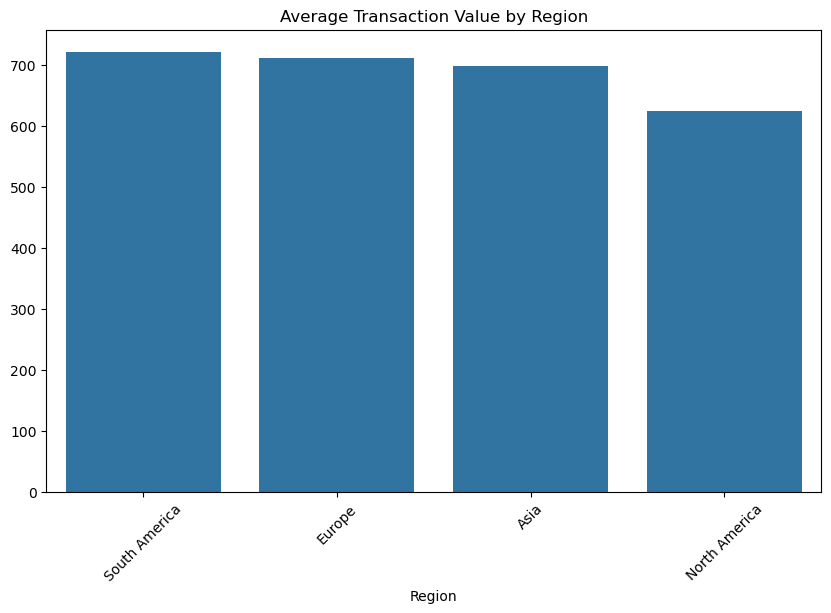

In [1]:
# Code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

# Merge datasets
merged_data = pd.merge(transactions, products, on='ProductID')
merged_data = pd.merge(merged_data, customers, on='CustomerID')

# EDA: Total transactions per product category
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

# EDA: Top 10 customers by total spending
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Total Spending')
plt.xticks(rotation=45)
plt.show()

# EDA: Distribution of transaction quantities
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Quantity'], bins=20, kde=True)
plt.title('Distribution of Transaction Quantities')
plt.show()

# EDA: Total sales over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
time_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
time_sales.plot(figsize=(10, 6))
plt.title('Total Sales Over Time')
plt.show()

# EDA: Average transaction value by region
region_avg = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg.index, y=region_avg.values)
plt.title('Average Transaction Value by Region')
plt.xticks(rotation=45)
plt.show()

## Insights:

1. Products with higher sales margin:-
   Electronics and Books Dominate Sales: The highest sales are in the Electronics and Books categories, indicating strong customer interest in these   product types.23 Revenue driving factor:-
    
Top Customers Drive Revenue: A small group of top customers contributes significantly to total revenue, suggesting the importance of customer retention strategies34 Volume and Nature of the transactions:-
    

Most Transactions Are Small: The majority of transactions involve small quantities, indicating a preference for smaller purchas45 Growth of the sales over a period of time
    s.

Sales Growth Over Time: Sales show a steady increase over time, reflecting positive business gr56 Regional Spending Variations:
    wth.

Regional Spending Variations: Customers in certain South America.g., Asia) have higher average transaction values, highlighting potential regional market oppornities.



# Task 2: Building a Lookalike Model that takes a user's information as input and recommends 3 similar 
customers based on their profile and transaction history.

# The approach followed to solve this task is as follows:
1. Data Preparation: The code merges transaction, product, and customer data to create a unified dataset.
2. 
Customer-Product Matrix: A matrix is created where rows represent customers and columns represent products, with values indicating the quantity purchase.3. 

Standardization: The matrix is standardized to ensure fair comparison across customr4. s.

Cosine Similarity: Cosine similarity is computed to measure how similar customers are based on their purchase hit5. ory.

Top 3 Lookalikes: For each of the first 20 customers, the top 3 most similar customers are identified along with their similaritys6. cores.

Output: The results are saved in a CSV file named Lookalike.csv, mapping each customer to their top 3 lookalikes and similari scores.

score>>

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

# Merge datasets
merged_data = pd.merge(transactions, products, on='ProductID')
merged_data = pd.merge(merged_data, customers, on='CustomerID')

# Create customer-product matrix
customer_product_matrix = merged_data.pivot_table(index='CustomerID', columns='ProductID', values='Quantity', fill_value=0)

# Standardize the matrix
scaler = StandardScaler()
customer_product_matrix_scaled = scaler.fit_transform(customer_product_matrix)

# Compute cosine similarity
similarity_matrix = cosine_similarity(customer_product_matrix_scaled)

# Create a DataFrame for similarity scores
similarity_df = pd.DataFrame(similarity_matrix, index=customer_product_matrix.index, columns=customer_product_matrix.index)

# Function to get top 3 lookalikes
def get_top_lookalikes(customer_id, similarity_df):
    if customer_id not in similarity_df.index:
        return f"Customer ID {customer_id} not found in the data."
    similarities = similarity_df.loc[customer_id].sort_values(ascending=False)
    top_3 = similarities.iloc[1:4]  # Exclude the customer itself
    return list(zip(top_3.index, top_3.values))

# Input customer ID in run time
customer_id_input = input("Enter Customer ID to find similar customers: ")
result = get_top_lookalikes(customer_id_input, similarity_df)

# Display result
if isinstance(result, str):
    print(result)
else:
    print(f"Top 3 similar customers for {customer_id_input}:")
    for cust, score in result:
        print(f"Customer ID: {cust}, Similarity Score: {score:.4f}")


Enter Customer ID to find similar customers:  C0001


Top 3 similar customers for C0001:
Customer ID: C0194, Similarity Score: 0.4034
Customer ID: C0020, Similarity Score: 0.3654
Customer ID: C0104, Similarity Score: 0.3425


# Task 3: Customer Segmentation / Clustering

# The approach taken to solve this task is as follows:

1. Data Loading: Loaded Customers.csv and Transactions.csv and merged them using CustomerID.
2. Feature Engineering: Extracted RFM features (Recency, Frequency, Monetary) for each customer.
3. Data Normalization: Standardized RFM features using StandardScaler for consistent scaling.
4. Clustering: Applied KMeans clustering with clusters ranging from 2 to 10.
5. Evaluation: Calculated the Davies-Bouldin Index to select the optimal number of clusters (3).
6. Cluster Assignment: Assigned customers to their respective clusters and appended cluster labels to the dataset.
7. Visualization: Plotted a scatter plot of clusters based on Recency and Frequency for better interpretation.
8. Cluster Details: Printed the list of customers in each cluster, including the number of customers per cluster.

C:\Users\91894\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91894\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91894\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91894\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

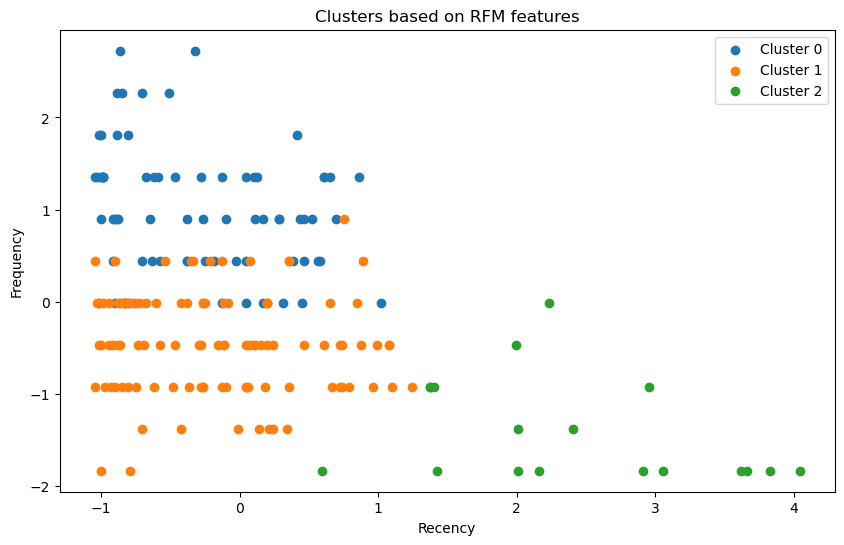

Optimal Number of Clusters: 3
Davies-Bouldin Index: 0.880


In [9]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Merge the datasets on CustomerID
merged_df = pd.merge(customers_df, transactions_df, on="CustomerID")

# Create a summary dataset for clustering: Recency, Frequency, and Monetary (RFM) analysis
# Recency: Days since last transaction
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
recency = merged_df.groupby('CustomerID')['TransactionDate'].max().apply(lambda x: (merged_df['TransactionDate'].max() - x).days)

# Frequency: Total number of transactions
frequency = merged_df.groupby('CustomerID')['TransactionID'].count()

# Monetary: Total spending
monetary = merged_df.groupby('CustomerID')['TotalValue'].sum()

# Create the RFM dataframe
rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index()

# Normalize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Perform KMeans clustering with an optimal number of clusters (between 2 and 10)
cluster_metrics = {}
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    db_index = davies_bouldin_score(rfm_scaled, labels)
    cluster_metrics[n_clusters] = db_index

# Find the number of clusters with the lowest DB Index
optimal_clusters = min(cluster_metrics, key=cluster_metrics.get)
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans_optimal.fit_predict(rfm_scaled)

# Visualization: Cluster Centers
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = rfm_scaled[rfm_df['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')
plt.title("Clusters based on RFM features")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index: {cluster_metrics[optimal_clusters]:.3f}")


In [11]:
# Show items in each cluster
for cluster in range(optimal_clusters):
    cluster_items = rfm_df[rfm_df['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_items)} items):")
    print(cluster_items)

print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index: {cluster_metrics[optimal_clusters]:.3f}")



Cluster 0 (71 items):
    CustomerID  Recency  Frequency  Monetary  Cluster
3        C0004        4          8   5354.88        0
7        C0008       11         10   4271.61        0
11       C0012        3          7   5231.26        0
12       C0013       55          7   6000.56        0
16       C0017       26          8   4753.82        0
..         ...      ...        ...       ...      ...
185      C0187       77          5   4612.44        0
186      C0188        1          8   7111.32        0
192      C0194       67          7   3869.17        0
193      C0195       33          6   4036.27        0
198      C0200       17          5   4758.60        0

[71 rows x 5 columns]

Cluster 1 (110 items):
    CustomerID  Recency  Frequency  Monetary  Cluster
0        C0001       55          5   3354.52        1
1        C0002       25          4   1862.74        1
2        C0003      125          4   2725.38        1
4        C0005       54          3   2034.24        1
5        C00

# Insights Report:

1. Number of Clusters Formed:
       Optimal Clusters: 3 
           This was determined by evaluating the Davies-Bouldin Index for clusters between 2 and 10.

2. Davies-Bouldin Index (DB Index):
    Value: 0.880
    A lower value indicates a well-separated and compact clustering structure.

3. Other Metrics Considered:
    i)The model used RFM (Recency, Frequency, Monetary) features to segment customers into meaningful groups.
    ii)Clustering was performed using KMeans with StandardScaler to normalize the features.

4. Visualization of Clusters:
The scatter plot visualizes the clusters based on normalized Recency and Frequency values. Each cluster represents a unique customer segment.